In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
# mediapipe to extract keypoints and values from the hand regions
import mediapipe as mp

In [2]:
# pip install opencv-python

In [3]:
# pip install tensorflow

In [4]:
# pip install scikit-learn

In [5]:
#pip install mediapipe

## Keypoints using Mediapipe holistic 

In [6]:
# mediapipe holistic for detecting and leveraging the landmarks
mpHolistic = mp.solutions.holistic

# mediapipe drawing utilities for drawing the keypoints on the face and hands
mpDrawing = mp.solutions.drawing_utils


# title to show on the window
title = 'Hand Gesture Recognition using LSTM DL model'

In [7]:
# read the image and make predictions
def mpDetection(image, model):
    
    # convert BGR image format into RGB as open-cv reads the image data in RGB, however, mediapipe detects image in RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # make the image unwritable for saving the memory consumption
    image.flags.writeable = False
    
    # make the prediction using mediapipe
    results = model.process(image)
    
    # make the image writable
    image.flags.writeable = True
    
    # again, convert the image format into original ==> RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [8]:
# draw the landmarks on the face and hands

def drawLandmarks(image, results):
    # mpDrawing.draw_landmarks(image, results.face_landmarks, mpHolistic.FACE_CONNECTIONS)
    # draw the landmarks by passing image, landmarks and connections in the draw_landmarks function
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistic.POSE_CONNECTIONS)
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistic.HAND_CONNECTIONS)
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistic.HAND_CONNECTIONS)


In [9]:
# add colors on the landmarks
def drawColorfulLandmarks(image, results):
    
    
    # add grey color on the pose (between wrist and shoulder)
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistic.POSE_CONNECTIONS, 
                               mpDrawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                            )
    # add pink color on the landmarks of the left hand
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistic.HAND_CONNECTIONS, 
                              mpDrawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            )
    
    # add blue color on the landmarks of the right hand
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistic.HAND_CONNECTIONS, 
                               mpDrawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )
    

In [10]:
# capture camera
cap = cv2.VideoCapture(0) 
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# set the mediapipe model
with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # loop the frames of the webcam
    while cap.isOpened():
        # read the frame/image from the webcam
        ret, frame = cap.read()

        # make the detection
        image, results = mpDetection(frame, holistic)
        # print(results)
        
        # draw the landmarks
        drawColorfulLandmarks(image, results)


        # check if the frame was read successfully
        if not ret:
            print("Error: Could not read frame.")
            break

        # show the window
        cv2.imshow('Hand Gesture Recognition System with LSTM', image)

        # break the loop when 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break

# release the webcam
cap.release()

# close all OpenCV windows
cv2.destroyAllWindows()

In [11]:
results.face_landmarks.landmark

[x: 0.51168185
y: 0.5422291
z: -0.031297047
, x: 0.51076525
y: 0.4939509
z: -0.051319137
, x: 0.5127429
y: 0.51135474
z: -0.028759135
, x: 0.50573933
y: 0.4512046
z: -0.034861974
, x: 0.5108539
y: 0.479437
z: -0.05384598
, x: 0.51215106
y: 0.46216923
z: -0.049125116
, x: 0.5163767
y: 0.42332163
z: -0.020590609
, x: 0.45451462
y: 0.42759338
z: 0.025999509
, x: 0.51814073
y: 0.39380085
z: -0.012208943
, x: 0.5185266
y: 0.3758855
z: -0.012881071
, x: 0.5210816
y: 0.31167737
z: 0.0022941648
, x: 0.51160073
y: 0.5493202
z: -0.030303376
, x: 0.51199496
y: 0.5551665
z: -0.02721961
, x: 0.51271677
y: 0.5578525
z: -0.023193924
, x: 0.5128616
y: 0.56018066
z: -0.023550738
, x: 0.5125475
y: 0.5656246
z: -0.025405152
, x: 0.5123534
y: 0.5728958
z: -0.027941264
, x: 0.51251185
y: 0.58126104
z: -0.02725363
, x: 0.51341045
y: 0.59626865
z: -0.019108647
, x: 0.5113227
y: 0.5022315
z: -0.046937156
, x: 0.50405943
y: 0.5027684
z: -0.0333214
, x: 0.43115538
y: 0.38368055
z: 0.0793131
, x: 0.4795132
y: 0.

In [12]:
mpHolistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:

print('Face landmarks number: ', len(results.face_landmarks.landmark) )  # 468

print('Pose landmarks number: ', len(results.pose_landmarks.landmark) )  # 33

print('Right landmarks number: ', len(results.right_hand_landmarks.landmark) )  # 21

# print('Left landmarks number: ', len(results.left_hand_landmarks.landmark) )  # 21



Face landmarks number:  468
Pose landmarks number:  33
Right landmarks number:  21


## Extrack keypoint values

In [15]:
results.pose_landmarks.landmark
print('Length of the pose_landmarks: ', len(results.pose_landmarks.landmark))

Length of the pose_landmarks:  33


In [16]:
# store the x,y,z and visibility in the list of the array
pose = []

for res in results.pose_landmarks.landmark:
    pose.append(np.array([res.x, res.y, res.z, res.visibility]))
    
print(len(pose))

if(len(pose) == len(results.pose_landmarks.landmark)):
    print('Stored x,y,z and visibility in the list of the array as "pose"')
else:
    print('Not stored pose values completely')

33
Stored x,y,z and visibility in the list of the array as "pose"


In [17]:
pose_data = []

# check if pose landmarks are present in the results
if results.pose_landmarks:
    # extract x, y, z, and visibility for each pose landmark
    for landmark in results.pose_landmarks.landmark:
        pose_data.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
else:
    # if no pose landmarks are present, set pose_data to zeros
    pose_data = np.zeros(132)

# convert pose_data to a NumPy array
pose = np.array(pose_data)

len(pose)

132

#### Same thing for the left, right hands and face  landmarks

In [18]:

# mutiple the set of the landmarks by flatten() and if the left hand is not on the frame, then store 0 value where 21 = length  and 3 = x,y,z values
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
print('Length of the left hand landmarks', len(lh))

# mutiple the set of the landmarks by flatten() and if the right hand is not on the frame, then store 0 value where 21 = length  and 3 = x,y,z values
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

print('Length of the right hand landmarks', len(rh))

Length of the left hand landmarks 63
Length of the right hand landmarks 63


In [19]:
# same thing for the face landmarks
len(results.face_landmarks.landmark)

468

#### 468 means the length of the face landmarks is 468 and it needs 468 * 3 = 1404  values if the face is not on the frame

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(468*3)
len(face)

1404

In [21]:
# using the same above concept but wrapping the landmarks of the face, pose, hands in a function and concatating them
def extractKeypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
print('Total keypoints : ', len(extractKeypoints(results)))
extractKeypoints(results)

Total keypoints :  1662


array([ 0.51271415,  0.48393434, -1.14932382, ...,  0.1024925 ,
        0.32588828, -0.04285762])

#### Concatenating each keypoint from the pose, face, left and right hands i.e 33*4 + 468 * 3 + 21 * 3 + 21 * 3 = 1662

In [23]:
resultTest = extractKeypoints(results)
# saving the data
#np.save('0', resultTest)

In [24]:
# np.load('0.npy')

array([ 0.51271415,  0.48393434, -1.14932382, ...,  0.1024925 ,
        0.32588828, -0.04285762])

# Setup folder for collection

In [25]:
# path for the exported data
DATA_PATH = os.path.join('DATA')

# gestures for detecting
gestures = np.array(['hello', 'thanks', 'iloveyou'])

# 30 videos of the data, sequence also known as video here i.e 1 hand gesture ==> 30 videos 
sequencesNum = 30

# 30 frames in length for each video  i.e 1 video = 30 frames
sequenceLength = 30





In [26]:

# only three gestures ie 'thanks', 'iloveyou', 'hello'
for gesture in gestures:
    # 30 frames in each sequence/video/gesture
    for sequence in range(sequencesNum):
        try:
            # create 30 folders as 0, 1, 2, 3, ... 29
            os.makedirs(os.path.join(DATA_PATH, gesture, str(sequence)))
        except:
            pass

# Collect keypoint values for testing and training

In [27]:
# create a function to start collecting keypoint values data
def startCollectingKeypoints():
    # capture camera
    cap = cv2.VideoCapture(0) 
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        exit()

    # set the mediapipe model
    with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        # loop through gestures ==> the frames of the webcam
        for gesture in gestures:

            # loop through sequence/video
            for sequence in range(sequencesNum):

                # loop through video length/sequence length
                for frameNum in range(sequenceLength):
                    # read the frame/image from the webcam
                    ret, frame = cap.read()

                     # check if the frame was read successfully
                    if not ret:
                        print("Error: Could not read frame.")
                        break

                    # make the detection of the landmarks using mediapipe
                    image, results = mpDetection(frame, holistic)
                    # print(results)

                    # draw the landmarks
                    drawColorfulLandmarks(image, results)

                    # show the window
                    cv2.imshow(title, image)

                    # logic for waiting each sequence/video data collection ==> break 2 seconds = 30 frames in each video/sequence
                    # frame number 0 is the starting frame and 29 is the ending frame of a video/sequence
                    if frameNum == 0: 
                        # write and style the message text
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(gesture, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                        # show the screen
                        cv2.imshow(title, image)

                        # break 2 seconds to start collecting 30 frames in a single video/sequence
                        cv2.waitKey(2000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(gesture, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow(title, image)

                    # export keypoints and save it
                    keypoints = extractKeypoints(results)

                    # save the data as created directories in above ie os.makedirs(os.path.join(DATA_PATH, gesture, str(sequence)))
                    npy_path = os.path.join(DATA_PATH, gesture, str(sequence), str(frameNum))
                    np.save(npy_path, keypoints)


                    # break the loop when 'q' key is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                            break

    # release the webcam
    cap.release()

    # close all OpenCV windows
    cv2.destroyAllWindows()





In [28]:
# calling a function to collect data
#startCollectingKeypoints()

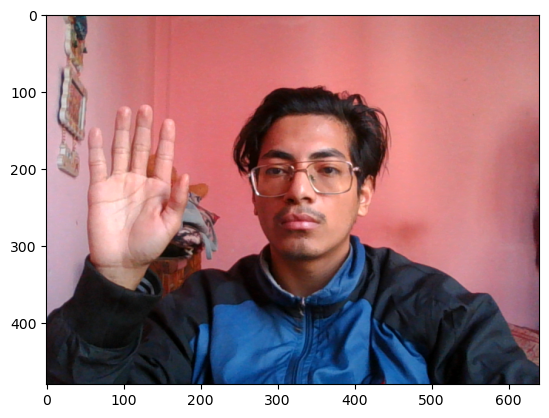

In [29]:
# visualizing the last image/frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


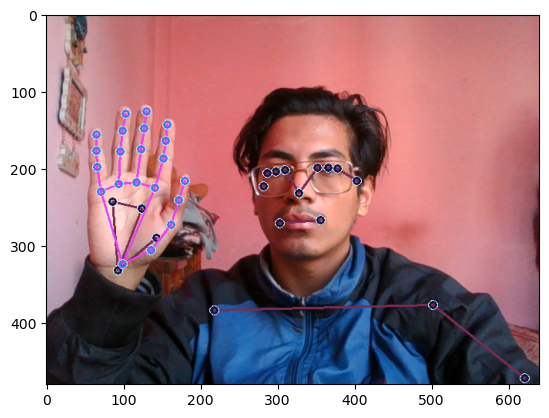

In [30]:
# drawing the landmarks on the frame with styling
drawColorfulLandmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#### Note: There 1662*30 = 49860 total landmarks in each hand gesture so that means 49860 * 3 = 149580 total landmarks from 3 gestures i.e. hello, thanks and iloveyou
#### where, 1662 = Concatenating each keypoint from the pose, face, left and right hands i.e 33*4 + 468 * 3 + 21 * 3 + 21 * 3 = 1662

# Preprocess the data 

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
# create labels in dictionary
labelMap = {}

# enumerate through gestures list to create the labelMap
for num, label in enumerate(gestures):
    labelMap[label] = num


In [33]:
labelMap

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [34]:
sequences, labels = [], []
# sequences represent feature date or x data and labels represent the lable name or y data

for gesture in gestures:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, gesture))).astype(int):
        # store different frames of that sequence
        window = []
        for frameNum in range(sequenceLength):
            # grab each frame and append to the window
            res = np.load(os.path.join(DATA_PATH, gesture, str(sequence), "{}.npy".format(frameNum)))
            window.append(res)
        # append the window in the sequnces with contain 90 videos and each video has 30 frames
        sequences.append(window)
        labels.append(labelMap[gesture])

In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
np.array(labels).shape

(90,)

In [37]:
X = np.array(sequences)

In [38]:
X.shape

(90, 30, 1662)

In [39]:
# store binary data of the labels
y = to_categorical(labels).astype(int)

In [40]:
# split training and testing data, only 5% data are testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
X_train.shape

(85, 30, 1662)

In [42]:
y_train.shape

(85, 3)

# Build and train LSTM neural network

In [43]:
# this allows to build sequential neural network
from tensorflow.keras.models import Sequential
 # this LSTM layer gives temporal component to build neural network and allows to detect hand gesture detection
from tensorflow.keras.layers import LSTM, Dense
# this allows to trace and monitor the training model
from tensorflow.keras.callbacks import TensorBoard

In [44]:
# define the path to the directory where TensorBoard logs will be stored
log_dir = os.path.join('Logs')

# create a TensorBoard callback with the specified log directory
tb_callback = TensorBoard(log_dir=log_dir)


In [45]:

# create a sequential model
model = Sequential()

# add the first LSTM layer with 64 units, returning sequences, using ReLU activation, and specifying input shape
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))

# add the second LSTM layer with 128 units, returning sequences, and using ReLU activation
model.add(LSTM(128, return_sequences=True, activation='relu'))

# add the third LSTM layer with 64 units, not returning sequences, and using ReLU activation
model.add(LSTM(64, return_sequences=False, activation='relu'))

# add a Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# add a Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# add the output Dense layer with units equal to the number of classes (actions) and softmax activation
model.add(Dense(gestures.shape[0], activation='softmax'))
# softmax adds all the values


In [46]:
# compile the model with specified configurations for training, categorical_crossentropy is used for multi-class classification
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [47]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])
# Note: took 14 mins to train

Epoch 1/1000


3/3 [==============================] - 5s 46ms/step - loss: 12.3173 - categorical_accuracy: 0.3294
Epoch 2/1000
3/3 [==============================] - 0s 39ms/step - loss: 21.0146 - categorical_accuracy: 0.3176
Epoch 3/1000
3/3 [==============================] - 0s 38ms/step - loss: 12.3273 - categorical_accuracy: 0.3882
Epoch 4/1000
3/3 [==============================] - 0s 40ms/step - loss: 13.7782 - categorical_accuracy: 0.3529
Epoch 5/1000
3/3 [==============================] - 0s 39ms/step - loss: 6.4703 - categorical_accuracy: 0.4353
Epoch 6/1000
3/3 [==============================] - 0s 38ms/step - loss: 8.5304 - categorical_accuracy: 0.3412
Epoch 7/1000
3/3 [==============================] - 0s 37ms/step - loss: 5.5034 - categorical_accuracy: 0.4706
Epoch 8/1000
3/3 [==============================] - 0s 41ms/step - loss: 8.5830 - categorical_accuracy: 0.3647
Epoch 9/1000
3/3 [==============================] - 0s 40ms/step - loss: 5.8744 - categorical_accuracy: 0.

3/3 [==============================] - 0s 37ms/step - loss: 0.4238 - categorical_accuracy: 0.7765
Epoch 143/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.4036 - categorical_accuracy: 0.7765
Epoch 144/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.3760 - categorical_accuracy: 0.8471
Epoch 145/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.3556 - categorical_accuracy: 0.8588
Epoch 146/1000
3/3 [==============================] - 0s 43ms/step - loss: 0.3519 - categorical_accuracy: 0.8706
Epoch 147/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.3494 - categorical_accuracy: 0.8471
Epoch 148/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.2903 - categorical_accuracy: 0.8941
Epoch 149/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.3003 - categorical_accuracy: 0.8941
Epoch 150/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.3015 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 45ms/step - loss: 0.4277 - categorical_accuracy: 0.7765
Epoch 287/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.3996 - categorical_accuracy: 0.7765
Epoch 288/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.3946 - categorical_accuracy: 0.8353
Epoch 289/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.3801 - categorical_accuracy: 0.8235
Epoch 290/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.3899 - categorical_accuracy: 0.8471
Epoch 291/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.3890 - categorical_accuracy: 0.8118
Epoch 292/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.3965 - categorical_accuracy: 0.7882
Epoch 293/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.3967 - categorical_accuracy: 0.7765
Epoch 294/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.4114 - categorical_accuracy: 0.752

3/3 [==============================] - 0s 48ms/step - loss: 0.4593 - categorical_accuracy: 0.7176
Epoch 431/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.4504 - categorical_accuracy: 0.7059
Epoch 432/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.4280 - categorical_accuracy: 0.8353
Epoch 433/1000
3/3 [==============================] - 0s 48ms/step - loss: 0.4128 - categorical_accuracy: 0.7294
Epoch 434/1000
3/3 [==============================] - 0s 50ms/step - loss: 0.3934 - categorical_accuracy: 0.8235
Epoch 435/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.3786 - categorical_accuracy: 0.8471
Epoch 436/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.3801 - categorical_accuracy: 0.8235
Epoch 437/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.3788 - categorical_accuracy: 0.8118
Epoch 438/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.3846 - categorical_accuracy: 0.788

3/3 [==============================] - 0s 47ms/step - loss: 0.2944 - categorical_accuracy: 0.8824
Epoch 575/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.7812 - categorical_accuracy: 0.6824
Epoch 576/1000
3/3 [==============================] - 0s 50ms/step - loss: 1.5421 - categorical_accuracy: 0.6353
Epoch 577/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.9477 - categorical_accuracy: 0.6471
Epoch 578/1000
3/3 [==============================] - 0s 46ms/step - loss: 0.7547 - categorical_accuracy: 0.6941
Epoch 579/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.6709 - categorical_accuracy: 0.6235
Epoch 580/1000
3/3 [==============================] - 0s 48ms/step - loss: 0.6332 - categorical_accuracy: 0.6706
Epoch 581/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.4983 - categorical_accuracy: 0.6706
Epoch 582/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.4770 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 50ms/step - loss: 0.2250 - categorical_accuracy: 0.9059
Epoch 719/1000
3/3 [==============================] - 0s 52ms/step - loss: 0.2781 - categorical_accuracy: 0.8824
Epoch 720/1000
3/3 [==============================] - 0s 54ms/step - loss: 0.5385 - categorical_accuracy: 0.7647
Epoch 721/1000
3/3 [==============================] - 0s 50ms/step - loss: 0.3900 - categorical_accuracy: 0.8118
Epoch 722/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.5138 - categorical_accuracy: 0.7765
Epoch 723/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.2845 - categorical_accuracy: 0.8706
Epoch 724/1000
3/3 [==============================] - 0s 55ms/step - loss: 0.2839 - categorical_accuracy: 0.8471
Epoch 725/1000
3/3 [==============================] - 0s 50ms/step - loss: 0.2807 - categorical_accuracy: 0.9059
Epoch 726/1000
3/3 [==============================] - 0s 52ms/step - loss: 0.2700 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 47ms/step - loss: 0.0659 - categorical_accuracy: 0.9765
Epoch 863/1000
3/3 [==============================] - 0s 48ms/step - loss: 0.0342 - categorical_accuracy: 1.0000
Epoch 864/1000
3/3 [==============================] - 0s 48ms/step - loss: 0.0456 - categorical_accuracy: 0.9765
Epoch 865/1000
3/3 [==============================] - 0s 50ms/step - loss: 0.0472 - categorical_accuracy: 1.0000
Epoch 866/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.1588 - categorical_accuracy: 0.9529
Epoch 867/1000
3/3 [==============================] - 0s 48ms/step - loss: 0.1896 - categorical_accuracy: 0.8941
Epoch 868/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.2805 - categorical_accuracy: 0.9176
Epoch 869/1000
3/3 [==============================] - 0s 49ms/step - loss: 0.3018 - categorical_accuracy: 0.8706
Epoch 870/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.1743 - categorical_accuracy: 0.952

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

#### Note: 3 layers of LSTM and 3 layers of Dense are used to train the model. 596675 parameters are used to train it. 

# Predictions

In [49]:
res = model.predict(X_test)

1/1 [==============================] - 1s 531ms/step


In [50]:
gestures[np.argmax(res[0])]

'iloveyou'

In [51]:
gestures[np.argmax(y_test[2])]

'iloveyou'

# Save weights

In [52]:
model.save('gesture.h5')

C:\Users\shres\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
# reload if any changes
model.load_weights('gesture.h5')

# Evaluation using Confusion Matrix and Accuracy rate

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 12ms/step


In [56]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [57]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[56,  0],
        [ 0, 29]],

       [[58,  0],
        [ 0, 27]]], dtype=int64)

In [58]:
# multilabel_confusion_matrix??

In [59]:
accuracy_score(ytrue, yhat)

1.0

# Test in Real action

In [60]:
from scipy import stats

In [61]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

In [62]:
print(res)
type(res)

[[1.7970443e-01 7.2221525e-02 7.4807400e-01]
 [1.5447267e-06 9.9999845e-01 2.0739570e-11]
 [9.7868426e-05 2.1187745e-09 9.9990213e-01]
 [4.6173463e-04 4.7466489e-09 9.9953830e-01]
 [3.7133086e-03 2.2124827e-05 9.9626464e-01]]


numpy.ndarray

In [63]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    # Iterate over the rows (each row corresponds to a set of probabilities)
    for num, probs in enumerate(res):
        # Choose the index with the highest probability for visualization
        max_prob_index = np.argmax(probs)

        # Convert the maximum probability to an integer for the rectangle width
        prob_int = int(probs[max_prob_index] * 100)

        # Draw a colored rectangle based on the maximum probability
        cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[max_prob_index], -1)

        # Draw the gesture label on the frame
        cv2.putText(output_frame, actions[max_prob_index], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame


In [64]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    # Iterate over the probabilities and gestures
    for num, probs in enumerate(res):
        # Check if the array is 1D or 2D
        if len(probs.shape) == 1:
            max_prob_index = np.argmax(probs)
            max_prob_value = probs[max_prob_index]
        else:
            # If 2D, find the maximum probability across all arrays
            max_prob_index = np.unravel_index(np.argmax(probs, axis=None), probs.shape)
            max_prob_value = probs[max_prob_index]

        # Convert the maximum probability to an integer for the rectangle width
        prob_int = int(max_prob_value * 100)

        # Draw a colored rectangle based on the maximum probability
        cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[max_prob_index], -1)

        # Draw the gesture label on the frame
        cv2.putText(output_frame, actions[max_prob_index], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame


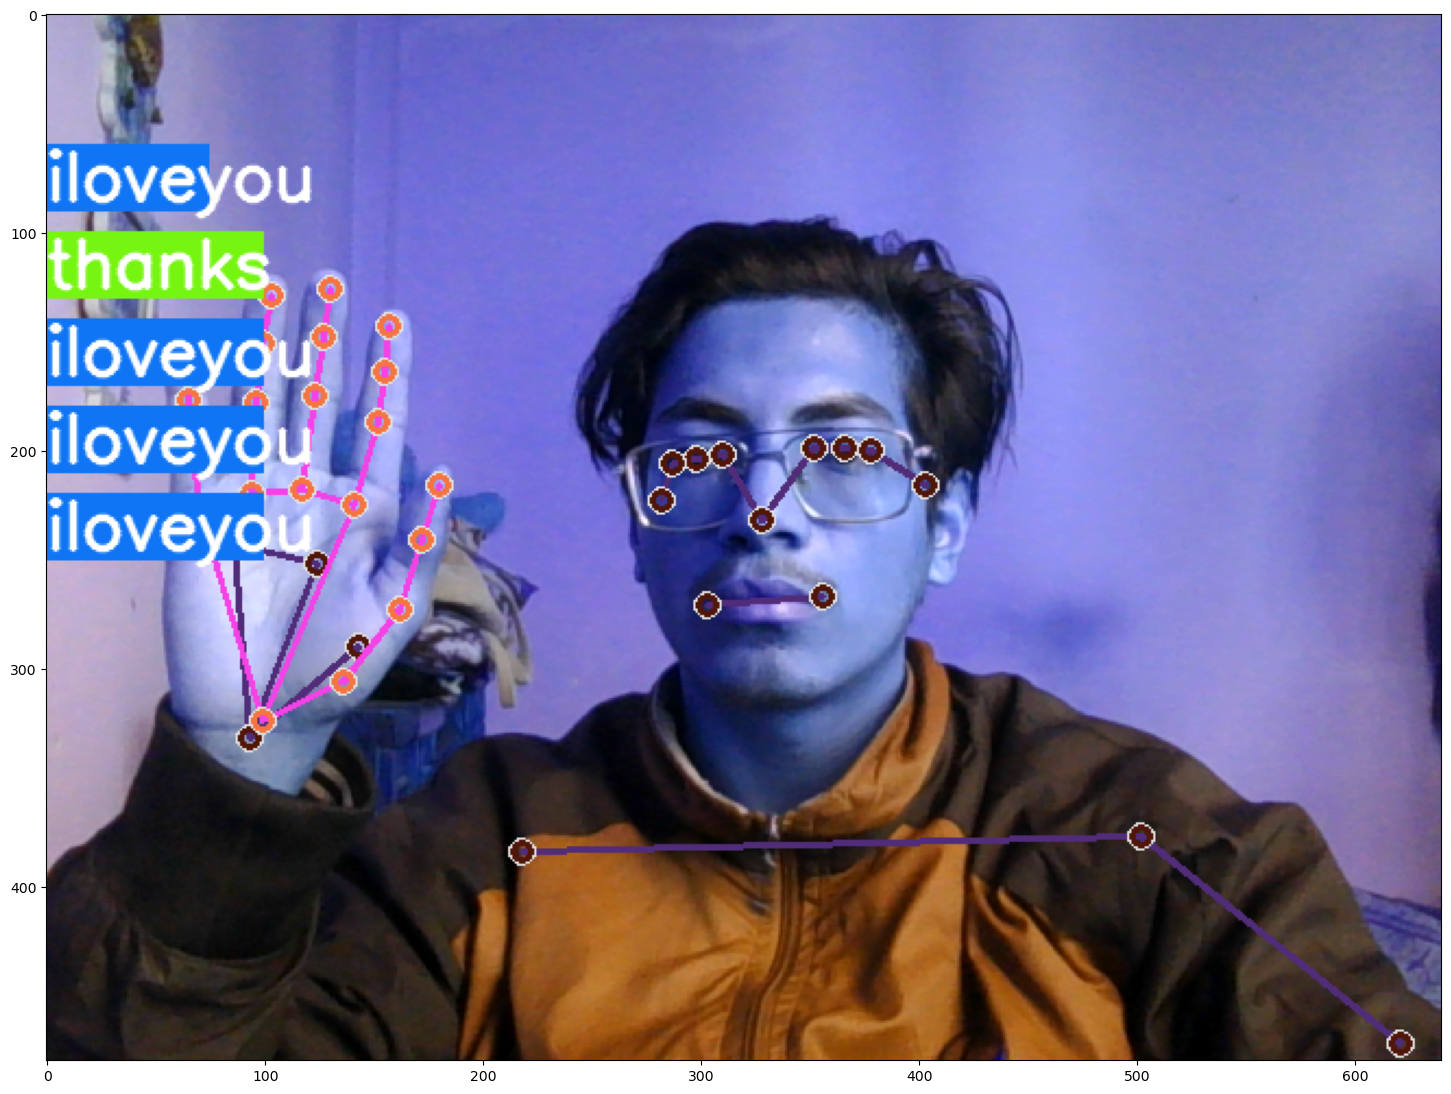

In [65]:
plt.figure(figsize=(18,18))

plt.imshow(prob_viz(res, gestures, image, colors))

In [66]:
res.shape

(5, 3)

In [67]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    # Iterate over the probabilities and gestures
    for num, probs in enumerate(res):
        # Find the index of the maximum probability
        max_prob_index = np.argmax(probs)
        # Find the value of the maximum probability
        max_prob_value = probs[max_prob_index]

        # Convert the maximum probability to an integer for the rectangle width
        prob_int = int(max_prob_value * 100)

        # Draw a colored rectangle based on the maximum probability
        cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[max_prob_index], -1)

        # Draw the gesture label on the frame
        cv2.putText(output_frame, actions[max_prob_index], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame


In [69]:

sequence = []
sentence = []
predictions = []
threshold = 0.4


# capture camera
cap = cv2.VideoCapture(0) 
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# set the mediapipe model
with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # loop the frames of the webcam
    while cap.isOpened():
        # read the frame/image from the webcam
        ret, frame = cap.read()
        
         # check if the frame was read successfully
        if not ret:
            print("Error: Could not read frame.")
            break

        # make the detection
        image, results = mpDetection(frame, holistic)
        # print(results)
        
        # draw the landmarks
        drawColorfulLandmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extractKeypoints(results)
        sequence.append(keypoints)
        # grab the last 30 frames
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            # print the label
            print(gestures[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        # if words are not in the sentence array, then, insert it
                        if gestures[np.argmax(res)] != sentence[-1]:
                            sentence.append(gestures[np.argmax(res)])
                    else:
                        # no gesture on the frame
                        sentence.append(gestures[np.argmax(res)])
                        
            # grab the last 5 values
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
           # image = prob_viz(res, gestures, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        


       

        # show the window
        cv2.imshow('Hand Gesture Recognition System with LSTM', image)

        # break the loop when 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break

# release the webcam
cap.release()

# close all OpenCV windows
cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 27ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 32ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 30ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 30ms/step
thanks
1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 28ms/ste

1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 22ms/step
thanks
1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 33ms/step
thanks
1/1 [==============================] - 0s 30ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 26ms/step
hello
1/1 [==============================] - 0s 31ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thank

1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 28ms/step
than

1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 23ms/step
hello
1/1 [==============================] - 0s 27ms/step
hello
1/1 [==============================] - 0s 28ms/step
hello
1/1 [==============================] - 0s 30ms/step
hello
1/1 [==============================] - 0s 31ms/step
iloveyou
1/1 [==============================] - 0s 22ms/step
iloveyou
1/1 [==============================] - 0s 23ms/step
iloveyou
1/1 [==============================] - 0s 25ms/step
iloveyou
1/1 [==============================] - 0s 27ms/step
iloveyou
1/1 [==============================] - 0s 26ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 26ms/step
iloveyou
1/1 [==============================] - 0s 28ms/step
iloveyou
1/1 [==============================] - 0s 28ms/step
iloveyou
1/1 [==============================] - 0s 26ms/step
iloveyou
1/1 [==============================] -

1/1 [==============================] - 0s 31ms/step
iloveyou
1/1 [==============================] - 0s 29ms/step
hello
1/1 [==============================] - 0s 23ms/step
iloveyou
1/1 [==============================] - 0s 31ms/step
iloveyou
1/1 [==============================] - 0s 23ms/step
iloveyou
1/1 [==============================] - 0s 26ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 27ms/step
hello
1/1 [==============================] - 0s 25ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 23ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 28ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 25ms/step
iloveyou
1/1 [=========================

1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 28ms/step
thanks
1/1 [==============================] - 0s 25ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 26ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 24ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 23ms/step
thanks
1/1 [==============================] - 0s 22ms/step
thanks
1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 28ms/step
than